# FILM PRODUCTION DATA ANALYSIS


## 🔴1. INTRODUCTION
In the competitive landscape of the film production industry, data-driven decision-making has become crucial to ensuring successful investments, targeted marketing, and sustained growth.

As our company prepares to venture into movie production and distribution, understanding the performance dynamics across major movie platforms is essential. This analysis focuses on evaluating and comparing the performance of films listed on several key platforms i.e; Box Office Mojo, The Numbers, Rotten Tomatoes, and The Movie Database (TMDb).

Each of these platforms offers unique metrics that reflect different aspects of a film's success; from box office revenue and audience ratings to critical reviews and streaming popularity. 

The insights derived from this analysis will guide strategic decisions on content creation, marketing approaches, and distribution channels, ultimately positioning our company to compete effectively in a data-driven entertainment market.

## 💡2. BUSINESS UNDERSTANDING

Before investing in new films, a production company must understand what factors contribute to a movie’s success commercially and critically. This includes not just revenue but also how movies perform across audience platforms

### 2.1 Business Questions

1. What trends exist across genres, release periods, and production budgets in relation to success?
2. What is the ideal runtime minutes for a movie?
3. Can early popularity forecast long-term success?
4. Are there common traits among low-performing films (genre, length, team)?
5. Which movie language performs best among different platforms

### ✍️2.2 Objectives
##### 1. Determining the movie runtime associated with the highest average audience rating
##### 2. Examining trends in average gross revenue of films over time.
##### 3. Examining movie production budget over the years
##### 4. Identifying ROI trends over the years
##### 5. Ranking the top 10 highest-grossing film studios
##### 6. Determining the most popular movie languages
##### 7. Identifying the top ranking movie genres over time
##### 8. Determining the release months with the highest audience engagement

 ## 💡 3. DATA UNDERSTANDING
For this analysis, I used 4 datasets with different aspects to evaluate different elements:

1. ##### IMDB
Gives ratings and movie basics

2. ##### Box Office Mojo

Provides revenue statistics for movies published in the Website

3. ##### The Movie Database(TMDB)

Also provides useful elements for movies published in the Movie database

4. ##### The Numbers

Provides revenue data from The numbers dataset


## ✍️3.1 DATA PREPARATION

In [9]:
# Import all the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import zipfile
import os


#### 3.1.1 IMDB DataBase

The IMDB is structured like the following ERD
![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v3/main/movie_data_erd.jpeg)


##### We will use sql to query data from the zipped data and connect the relevant tables

In [14]:
# Creates a temporary folder to store the unzipped folder for easy importation into the notebook
zipfile.ZipFile("im.zip", 'r').extractall("temp_folder")
# Create a connection for querrying the data
conn = sqlite3.connect("temp_folder/im.db")

In [16]:
#Use sql to querry the data now
movie_basics_ratings = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING (movie_id) ;"""
                 , conn)

In [18]:
#Check the first five entries of our data
movie_basics_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


#### The dataframe above has 8 columns:

1. `movie_id` - Unique Identifier of each movie entry
2. `primary_title` - The primary title of the movie
3. `original_title` - The Actual title of the movie
4. `start_year` - The year the movie was premiered

#### 3.1.2 Box Office Mojo

In [22]:
#Load the dataset and read the first 5 rows
bom_df= pd.read_csv("bom.movie_gross.csv")
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [24]:
# Identify the number of columns and rows
bom_df.shape

(3387, 5)

#### The box office dataframe has 5 columns and 3,387 entries. Each column holds a different aspect of the dataset:
1. `title` Contains the title of the movies
2. `studio` column has abbreviated names of the studios producing the respective movie
3. `domestic_gross` column shows the amount of revenue generated by the movie through sales, locally
4. `foreign_gross` shows the amount of revenue generated by the movie internationally
5. `year` shows the year when the movie was premiered

#### 3.1.3 The Movie Data Base

In [28]:
#Load the dataset and read the first 5 rows
TMDB = pd.read_csv("tmdb.movies.csv")
TMDB.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [30]:
tn_budget = pd.read_csv("tn.movie_budgets.csv")
tn_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### The above dataset is from The Movie DataBase, another platform where data from movies is stored. It contains 6 columns which represent different aspects also

## 3.2 Data Cleaning

#### 3.2.1 Movie Basics Ratings



In [35]:
#Check for important information of the dataset
movie_basics_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [37]:
round((movie_basics_ratings.isnull().sum()/ len(movie_basics_ratings))*100,2)

movie_id            0.00
primary_title       0.00
original_title      0.00
start_year          0.00
runtime_minutes    10.32
genres              1.09
averagerating       0.00
numvotes            0.00
dtype: float64

### The above code calculates the percentage of missing values from each column. one column with the highest number of missing values is the `runtime_minutes` column, with 10.32% of its data missing. However this has very low significance and can be easily dropped without affecting our data

In [40]:
# drop missing values 
movie_basics_ratings= movie_basics_ratings.dropna()

### 3.2.2. Box Office Mojo

In [43]:
round((bom_df.isnull().sum()/ len(bom_df))*100,2)

title              0.00
studio             0.15
domestic_gross     0.83
foreign_gross     39.86
year               0.00
dtype: float64

#### As from above, column `foreign_gross` holds the highest number of missing values, with 39.86% of its data missing. This however, can be calculated using other columns like `domestic_gross` and creating another column called `Total_gross` the computing using the mean of the total gross column

In [46]:
# Convert the two numeric number columns from strings to float datatypes
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'], errors='coerce')
# Calculate another column Total_gross for total gross generated both locally and internationaly
bom_df['Total_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,Total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [48]:
# Use the mean total gross to fill missing values for foreign gross
mean_total = bom_df['Total_gross'].mean()
bom_df.loc[bom_df['foreign_gross'].isna(), 'foreign_gross'] = (
    mean_total - bom_df.loc[bom_df['foreign_gross'].isna(), 'domestic_gross']
)

In [50]:
# Now fill missing values for total gross such that the previously missing values are now accounted for
bom_df['Total_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']

In [52]:
round((bom_df.isnull().sum()/ len(bom_df))*100,2)

title             0.00
studio            0.15
domestic_gross    0.83
foreign_gross     0.00
year              0.00
Total_gross       0.83
dtype: float64

#### The remaining data contains very few missing values, and we can drop these now without having a significant effect on our data

In [55]:
bom_df= bom_df.dropna()

### 3.2.3. The Numbers Dataset

In [58]:
round((tn_budget.isnull().sum()/ len(tn_budget))*100,2)

id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

#### This dataset has no missing values and is good to work with. However we need to check for info and find out if the datasets are in the right format

In [61]:
tn_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### Some of these columns need to be floats but they are object type. This can be corrected however

In [64]:
#Convert the date column into a pandas-recognizable datetime format
tn_budget['release_date'] = pd.to_datetime(tn_budget['release_date'])

In [66]:
columns = ['domestic_gross', 'production_budget', 'worldwide_gross']

# Remove $ and commas, then convert to float
for col in columns:
    tn_budget[col] = tn_budget[col].replace(r'[\$,]', '', regex=True).astype(float)

In [68]:
tn_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


#### 3.2.4 The Movies DataBase (TMDB)

We begin by checking any null values in the dataset

In [72]:
round((TMDB.isnull().sum()/ len(TMDB))*100,2)

Unnamed: 0           0.0
genre_ids            0.0
id                   0.0
original_language    0.0
original_title       0.0
popularity           0.0
release_date         0.0
title                0.0
vote_average         0.0
vote_count           0.0
dtype: float64

##### There are no null values in the dataset above and everything is as it should be so we jump to data analysis

## 4. EXPLORATORY DATA ANALYSIS

### 4.1. Calculating the Ideal RunTime for a Movie

##### We will visualize the highest rated runtime for a movie using the movie_basics_ratings dataframe 

In [78]:
movie_basics_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [80]:
# Define a function that removes outliers then visualize the ideal time
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]
movie_basics_ratings = remove_outliers(movie_basics_ratings, 'runtime_minutes')

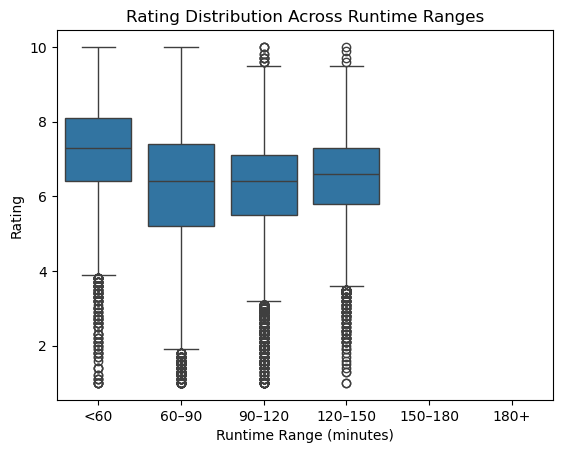

In [82]:
#Create bins first, divedi them as below 60, 60-90, 90-120, 120-150, 150-180 then 180+
movie_basics_ratings['runtime_bin'] = pd.cut(movie_basics_ratings['runtime_minutes'], bins=[0, 60, 90, 120, 150, 180, 300],
                           labels=['<60', '60–90', '90–120', '120–150', '150–180', '180+'])
#Visualize the bins using seaborn
sns.boxplot(x='runtime_bin', y='averagerating', data=movie_basics_ratings)
plt.title("Rating Distribution Across Runtime Ranges")
plt.xlabel("Runtime Range (minutes)")
plt.ylabel("Rating")
plt.show()

The highest rated movies range in the below 60 mark. Most movies produced range in the 60-90 mark.

### 4.2. Calculating the trends of both foreign and domestic gross over the years


In [86]:
# We will use the Box Office Mojo dataset
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,Total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [88]:
#Group your data
gross_by_year = bom_df.groupby('year')[['domestic_gross', 'foreign_gross', 'Total_gross']].mean().reset_index()


Visualize comparison between the domestic gross and foreign gross

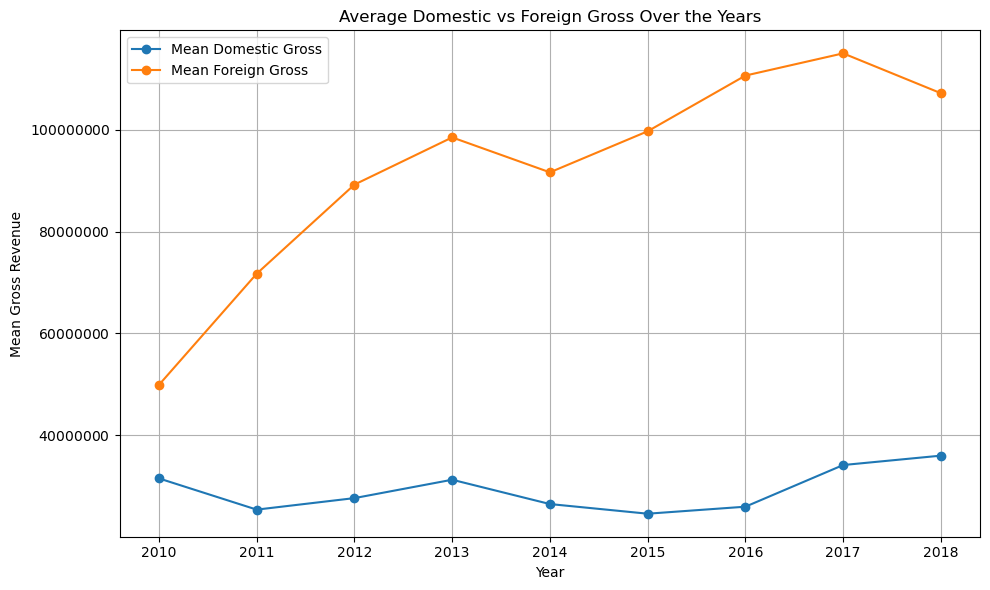

In [91]:
#Create plots. we use ticker to ensure our visualizations are well labelled
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 6))
plt.plot(gross_by_year['year'], gross_by_year['domestic_gross'], label='Mean Domestic Gross', marker='o')
plt.plot(gross_by_year['year'], gross_by_year['foreign_gross'], label='Mean Foreign Gross', marker='o')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='y')  # Ensures full number display
plt.xlabel('Year')
plt.ylabel('Mean Gross Revenue')
plt.title('Average Domestic vs Foreign Gross Over the Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [95]:
gross_by_year.value_counts()

year  domestic_gross  foreign_gross  Total_gross 
2010  3.154295e+07    4.989863e+07   8.144158e+07    1
2011  2.541436e+07    7.172126e+07   9.713562e+07    1
2012  2.767584e+07    8.921317e+07   1.168890e+08    1
2013  3.128212e+07    9.847945e+07   1.297616e+08    1
2014  2.650700e+07    9.162286e+07   1.181299e+08    1
2015  2.461338e+07    9.968588e+07   1.242993e+08    1
2016  2.598996e+07    1.106177e+08   1.366077e+08    1
2017  3.416646e+07    1.149797e+08   1.491462e+08    1
2018  3.601042e+07    1.071536e+08   1.431640e+08    1
Name: count, dtype: int64

#### The mean domestic gross of our data shoes consistency throughout the years, starting from $315,429,500 in 2010 to 360,104,200 in 2018. On the other side there is a visible increase in the mean foreign gross from 498,986,300 in 2010 to 1,071,536,000 in 2018

#### 4.2.2. Visualize The total gross of both domestic and foreign gross

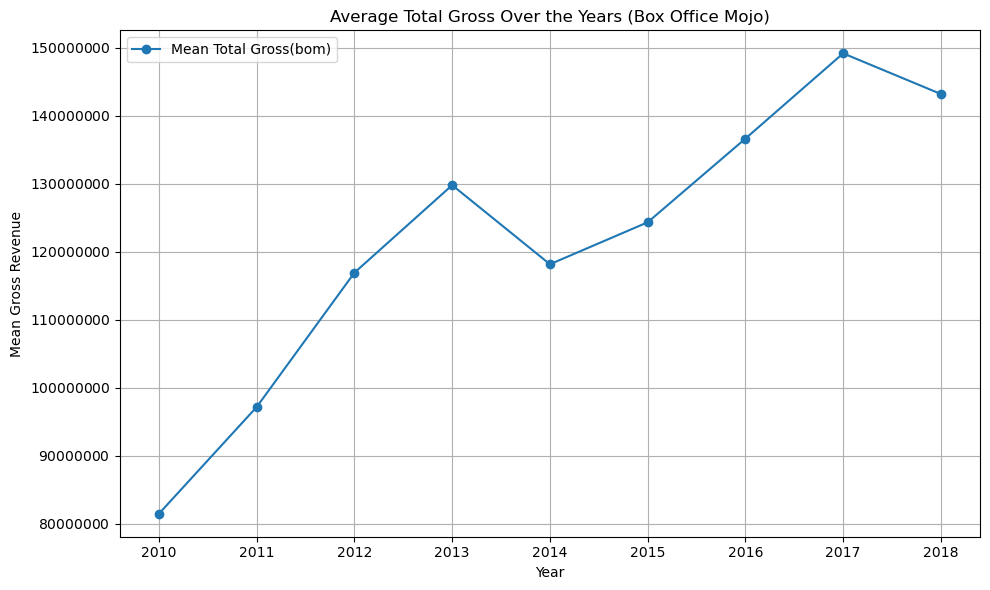

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(gross_by_year['year'], gross_by_year['Total_gross'], label='Mean Total Gross(bom)', marker='o')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='y')  # Ensures full number display
plt.xlabel('Year')
plt.ylabel('Mean Gross Revenue')
plt.title('Average Total Gross Over the Years (Box Office Mojo)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### This increase in gross is more visible in the total gross, increasing from 814,415,800 in 2010 to 1,431,640,000 in 2018

### 4.3. The numbers production budget over the  years

In [111]:
# Retrieve the year from the date time
tn_budget['year'] = tn_budget['release_date'].dt.year
# Group by year
avg_budget_by_year = tn_budget.groupby('year', as_index=False)['production_budget'].mean()

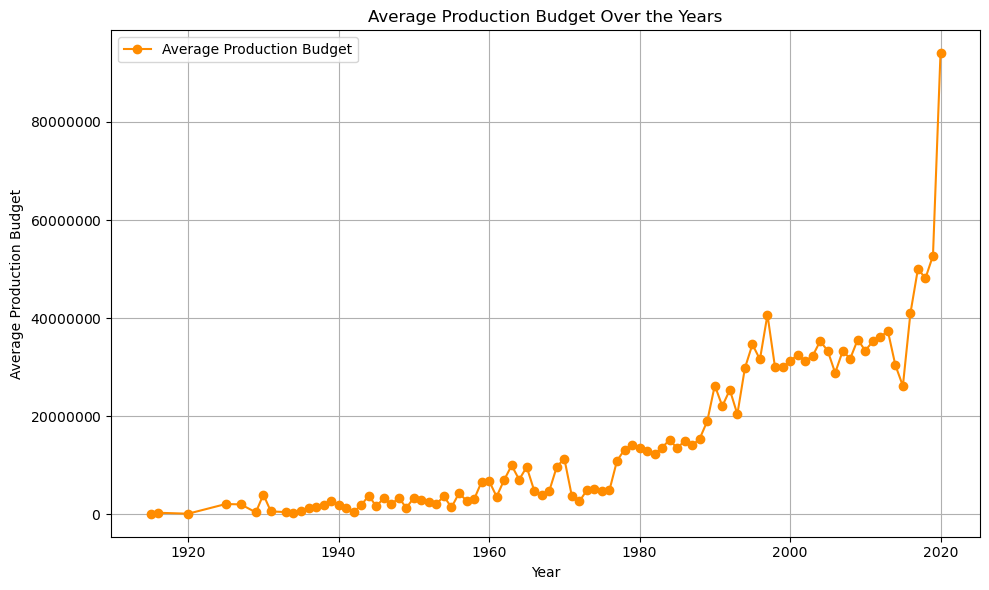

In [113]:
# Plot the production budget 
plt.figure(figsize=(10, 6))
plt.plot(avg_budget_by_year['year'], avg_budget_by_year['production_budget'], label='Average Production Budget', marker='o', color='darkorange')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='y')  # Show full numbers
plt.xlabel('Year')
plt.ylabel('Average Production Budget')
plt.title('Average Production Budget Over the Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [117]:
avg_budget_by_year .value_counts()

year  production_budget
1915  1.100000e+05         1
1916  2.929535e+05         1
1995  3.463400e+07         1
1994  2.978620e+07         1
1993  2.037973e+07         1
                          ..
1954  3.636667e+06         1
1953  2.128000e+06         1
1952  2.423333e+06         1
1951  2.958333e+06         1
2020  9.400000e+07         1
Name: count, Length: 96, dtype: int64

#### This budget increases gradually over time, and we can see an increase from 1,100,000 in 1915 to 940,000,000 in 2020. Now that we know that the production budget increases over time, does the return on investment also react the same?

### 4.4. Identifying trends of ROI over the years

In [124]:
tn_budget['domestic_roi'] = (tn_budget['domestic_gross'] - tn_budget['production_budget']) / tn_budget['production_budget']
tn_budget['worldwide_roi'] = (tn_budget['worldwide_gross'] - tn_budget['production_budget']) / tn_budget['production_budget']

In [126]:
tn_budget['year'] = tn_budget['release_date'].dt.year
roi_by_year = tn_budget.groupby('year', as_index=False)[['domestic_roi', 'worldwide_roi']].mean()

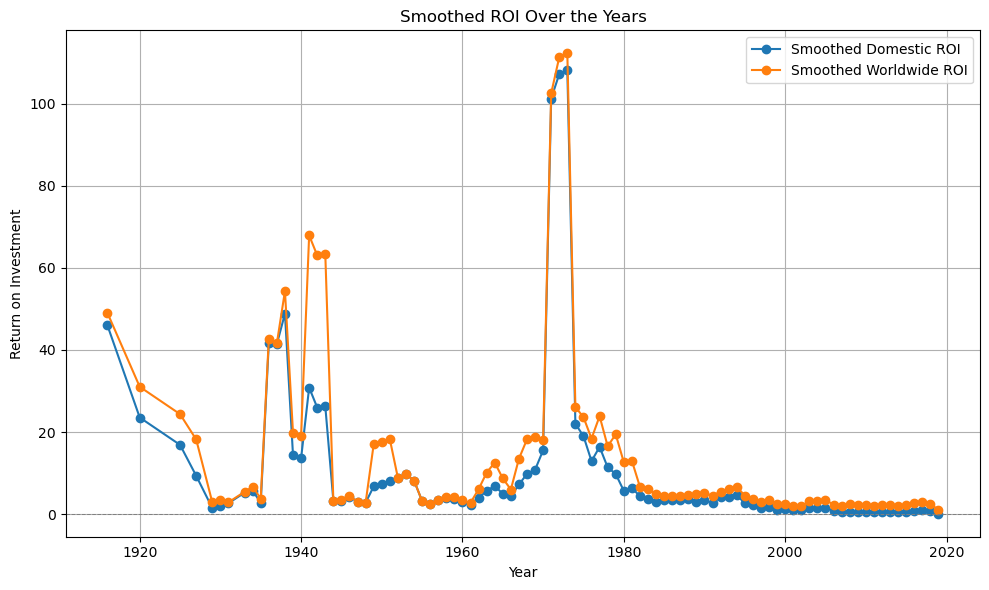

In [128]:
roi_by_year['domestic_roi_smooth'] = roi_by_year['domestic_roi'].rolling(window=3, center=True).mean()
roi_by_year['worldwide_roi_smooth'] = roi_by_year['worldwide_roi'].rolling(window=3, center=True).mean()

# Plot smoothed curves
plt.figure(figsize=(10, 6))
plt.plot(roi_by_year['year'], roi_by_year['domestic_roi_smooth'], label='Smoothed Domestic ROI', marker='o')
plt.plot(roi_by_year['year'], roi_by_year['worldwide_roi_smooth'], label='Smoothed Worldwide ROI', marker='o')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.xlabel('Year')
plt.ylabel('Return on Investment')
plt.title('Smoothed ROI Over the Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### The above shows a very unpredictable curve in both the domestic and worldwide ROI. In the early years; 1900's, the ROI was high, reaching over 50%, however in the recent years this has gone down to less than 10% annualy. High production budget and relatively low gross revenues are a contributor to this low ROI

### 4.5. Determining the highest grossing studios

In [132]:
bom_df['studio'].value_counts()

studio
IFC           166
Uni.          147
WB            140
Magn.         136
Fox           136
             ... 
TVC             1
E1              1
ELS             1
PalT            1
Synergetic      1
Name: count, Length: 255, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_30424\583256877.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=studio_gross.values, y=studio_gross.index, palette='viridis', )


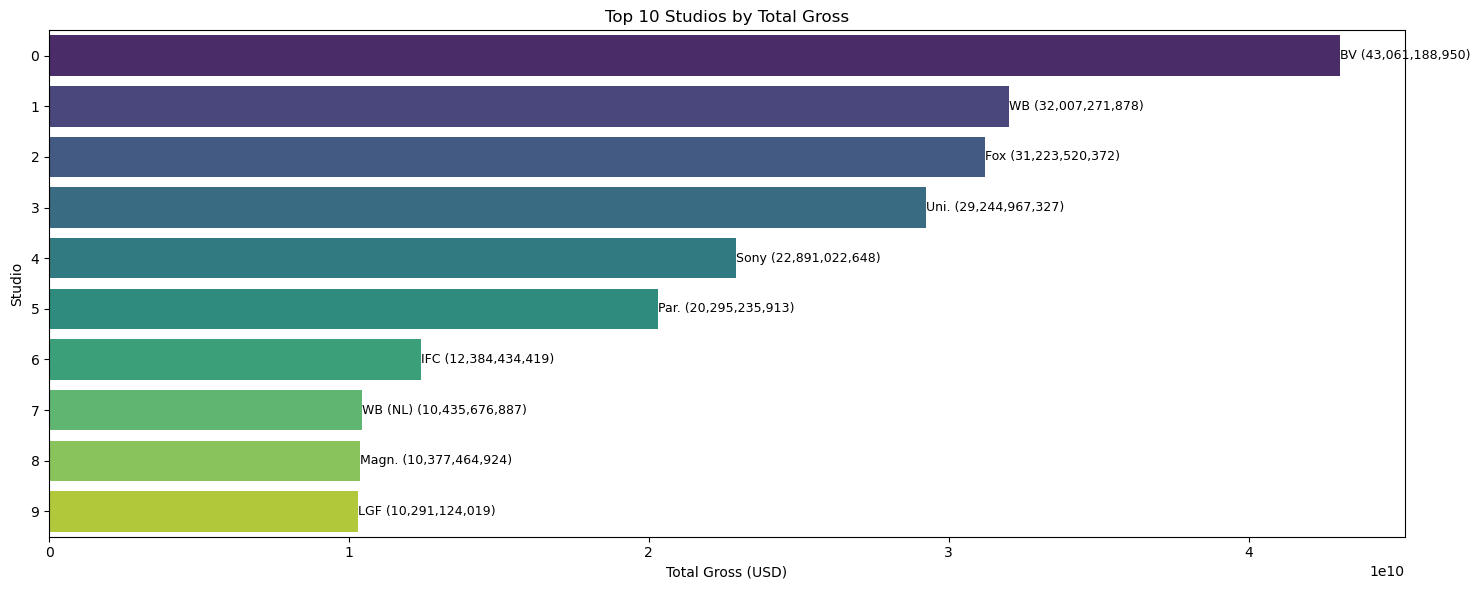

In [138]:
#Group the data first, by studio and calculate the total gross per category
studio_gross = bom_df.groupby('studio')['Total_gross'].sum().sort_values(ascending=False).head(10)
#Plot the visualization
plt.figure(figsize=(15,6))
sns.barplot(x=studio_gross.values, y=studio_gross.index, palette='viridis', )
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='y') 
# Ensure that it displays the names
for i, (value, name) in enumerate(zip(studio_gross.values, studio_gross.index)):
    plt.text(value + 1e6, i, f'{name} ({value:,.0f})', va='center', fontsize=9)

plt.title("Top 10 Studios by Total Gross")
plt.xlabel("Total Gross (USD)")
plt.ylabel("Studio")
plt.tight_layout()
plt.show()

#### The top ten most grossing studios as seen from above are BV, WB, Fox, Uni, Sony, Par., IFC, WB, Magn and LGF, we can also see their gross as Bv tops with 43,061,188,950 as total gross

### 4.6. Movie language and popularity

In [142]:
TMDB['original_language'].value_counts()

original_language
en    23291
fr      507
es      455
ru      298
ja      265
      ...  
bo        1
si        1
sl        1
hz        1
dz        1
Name: count, Length: 76, dtype: int64

#### The English movie language clearly tops, with 23,291 as total popularyty. now we will determine the second most popular movies languages besides English

In [150]:
# Group the data using the original language column
lang_popularity = TMDB.groupby('original_language', as_index=False)['popularity'].sum()
# Sort the values in a descending order
lang_popularity = lang_popularity.sort_values(by='popularity', ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_30424\1985064519.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_langs, x='popularity', y='original_language', palette='viridis')


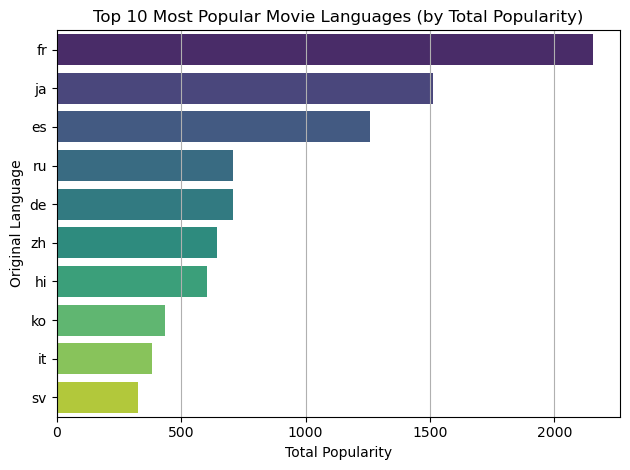

In [152]:
lang_popularity_no_extreme = lang_popularity.iloc[1:]
# Exluding english, as it is an extreme value 
top_langs = lang_popularity_no_extreme.head(10)
sns.barplot(data=top_langs, x='popularity', y='original_language', palette='viridis')
plt.title('Top 10 Most Popular Movie Languages (by Total Popularity)')
plt.xlabel('Total Popularity')
plt.ylabel('Original Language')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

In [160]:
top_langs.value_counts()

original_language  popularity
de                 706.787       1
es                 1257.725      1
fr                 2155.574      1
hi                 604.253       1
it                 383.344       1
ja                 1513.434      1
ko                 436.862       1
ru                 708.220       1
sv                 326.393       1
zh                 645.329       1
Name: count, dtype: int64

#### French is the second most popular language, with 2155.574 as the total popularity, other langages in the top are Spanish and Russian

### 4.7. Identifying the top ranking movie genres

In [164]:
# Extract each individual genre from the genres column
movie_basics_ratings['genres'] = movie_basics_ratings['genres'].str.split(',')
movie_basics_ratings= movie_basics_ratings.explode('genres')
movie_basics_ratings['genres'] = movie_basics_ratings['genres'].str.strip()

In [166]:
# Count the number of appearances
genre_counts = movie_basics_ratings['genres'].value_counts().sort_values(ascending=False).nlargest(20)
genre_counts.head()

genres
Drama          26860
Documentary    15565
Comedy         14712
Thriller        7218
Horror          6770
Name: count, dtype: int64

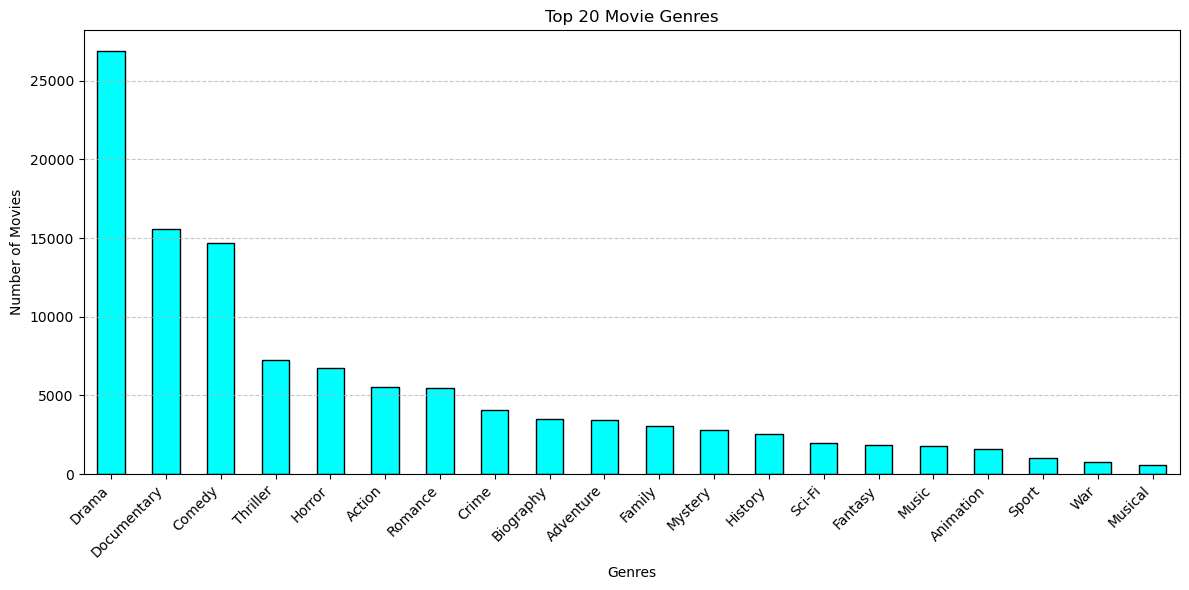

In [170]:
# Plot the genres
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='cyan', edgecolor='black')
plt.title('Top 20 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### As from above, the most produced genre of movies is Drama, with 28,394 productions, followed by Documantaries with 16,423 productions. Comedy, Thriller and Horror also top the list. On the other side of the list, Short films, Adult films and Game show are the least produced categories of movies, with 1, 2, and 2 productions respectively

#### Now let's visualize these genre popularity trends over the years

In [174]:
movie_basics_ratings['genres'] = movie_basics_ratings['genres'].str.split(',')
movie_basics_ratings = movie_basics_ratings.explode('genres')

top_genres = movie_basics_ratings['genres'].value_counts().nlargest(5).index
filtered_df = movie_basics_ratings[movie_basics_ratings['genres'].isin(top_genres)]

In [176]:
grouped = (
    filtered_df.groupby(['start_year', 'genres'])['averagerating']
    .mean()
    .reset_index()
)

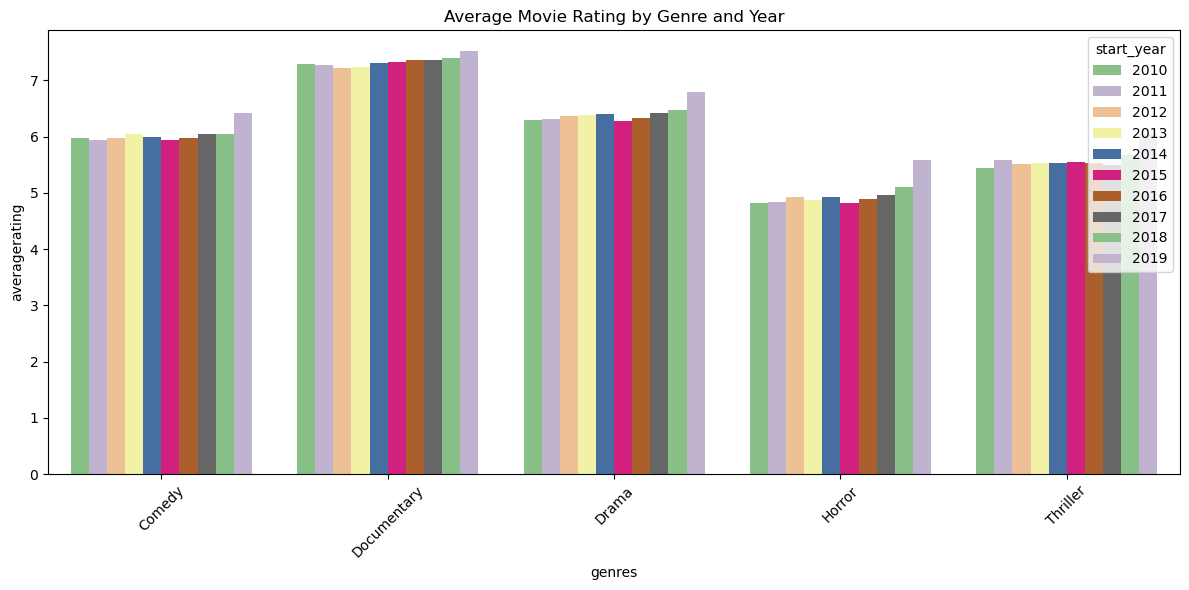

In [178]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=grouped,
    x="genres", y="averagerating", hue="start_year",
    palette="Accent" 
)

plt.title("Average Movie Rating by Genre and Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.8. Release Month with the highest Audience engagement

In [181]:
#Convert the column to a real datetime
TMDB['release_date'] = pd.to_datetime(TMDB['release_date'], errors='coerce')

In [183]:
# Extract the month name
TMDB['release_month'] = TMDB['release_date'].dt.month_name()

In [185]:
#Label your months
from pandas.api.types import CategoricalDtype

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
TMDB['release_month'] = TMDB['release_month'].astype(
    CategoricalDtype(categories=month_order, ordered=True)
)

In [187]:
# GRoup your vote counts by release month
monthly_votes = TMDB.groupby('release_month')['vote_count'].mean().reset_index()
monthly_votes = TMDB.groupby('release_month', observed=True)['vote_count'].sum().reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_30424\4027107515.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_votes = TMDB.groupby('release_month')['vote_count'].mean().reset_index()


C:\Users\USER\AppData\Local\Temp\ipykernel_30424\3980776314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_votes, x='release_month', y='vote_count', palette='magma')


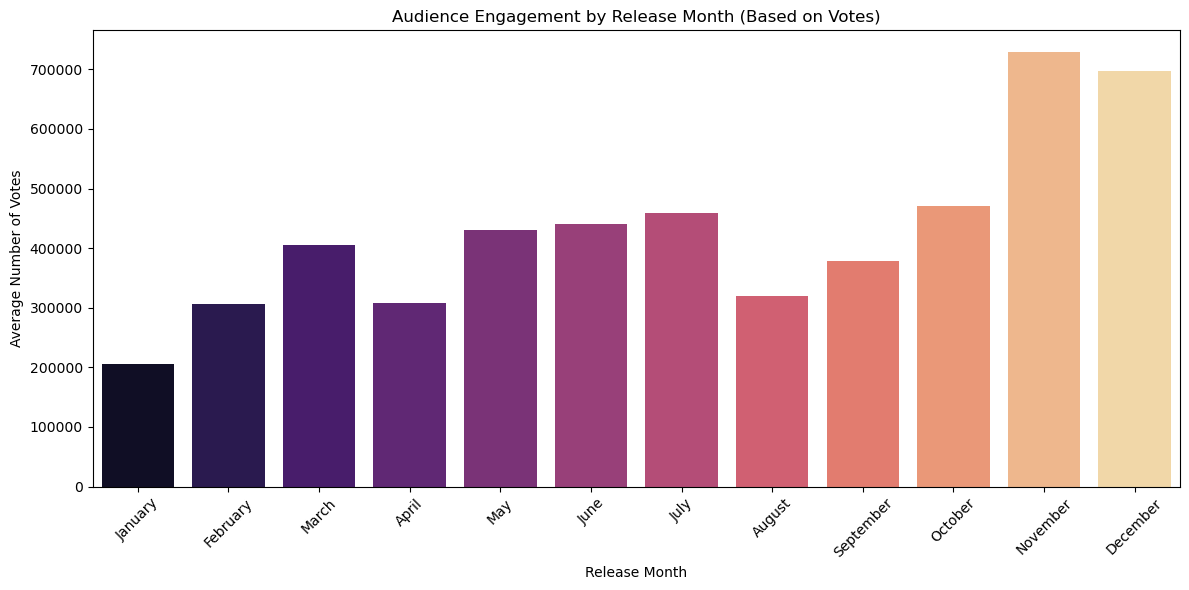

In [189]:
# Plot the visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_votes, x='release_month', y='vote_count', palette='magma')
plt.title('Audience Engagement by Release Month (Based on Votes)')
plt.ylabel('Average Number of Votes')
plt.xlabel('Release Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Summary statistics of The Numbers Dataset

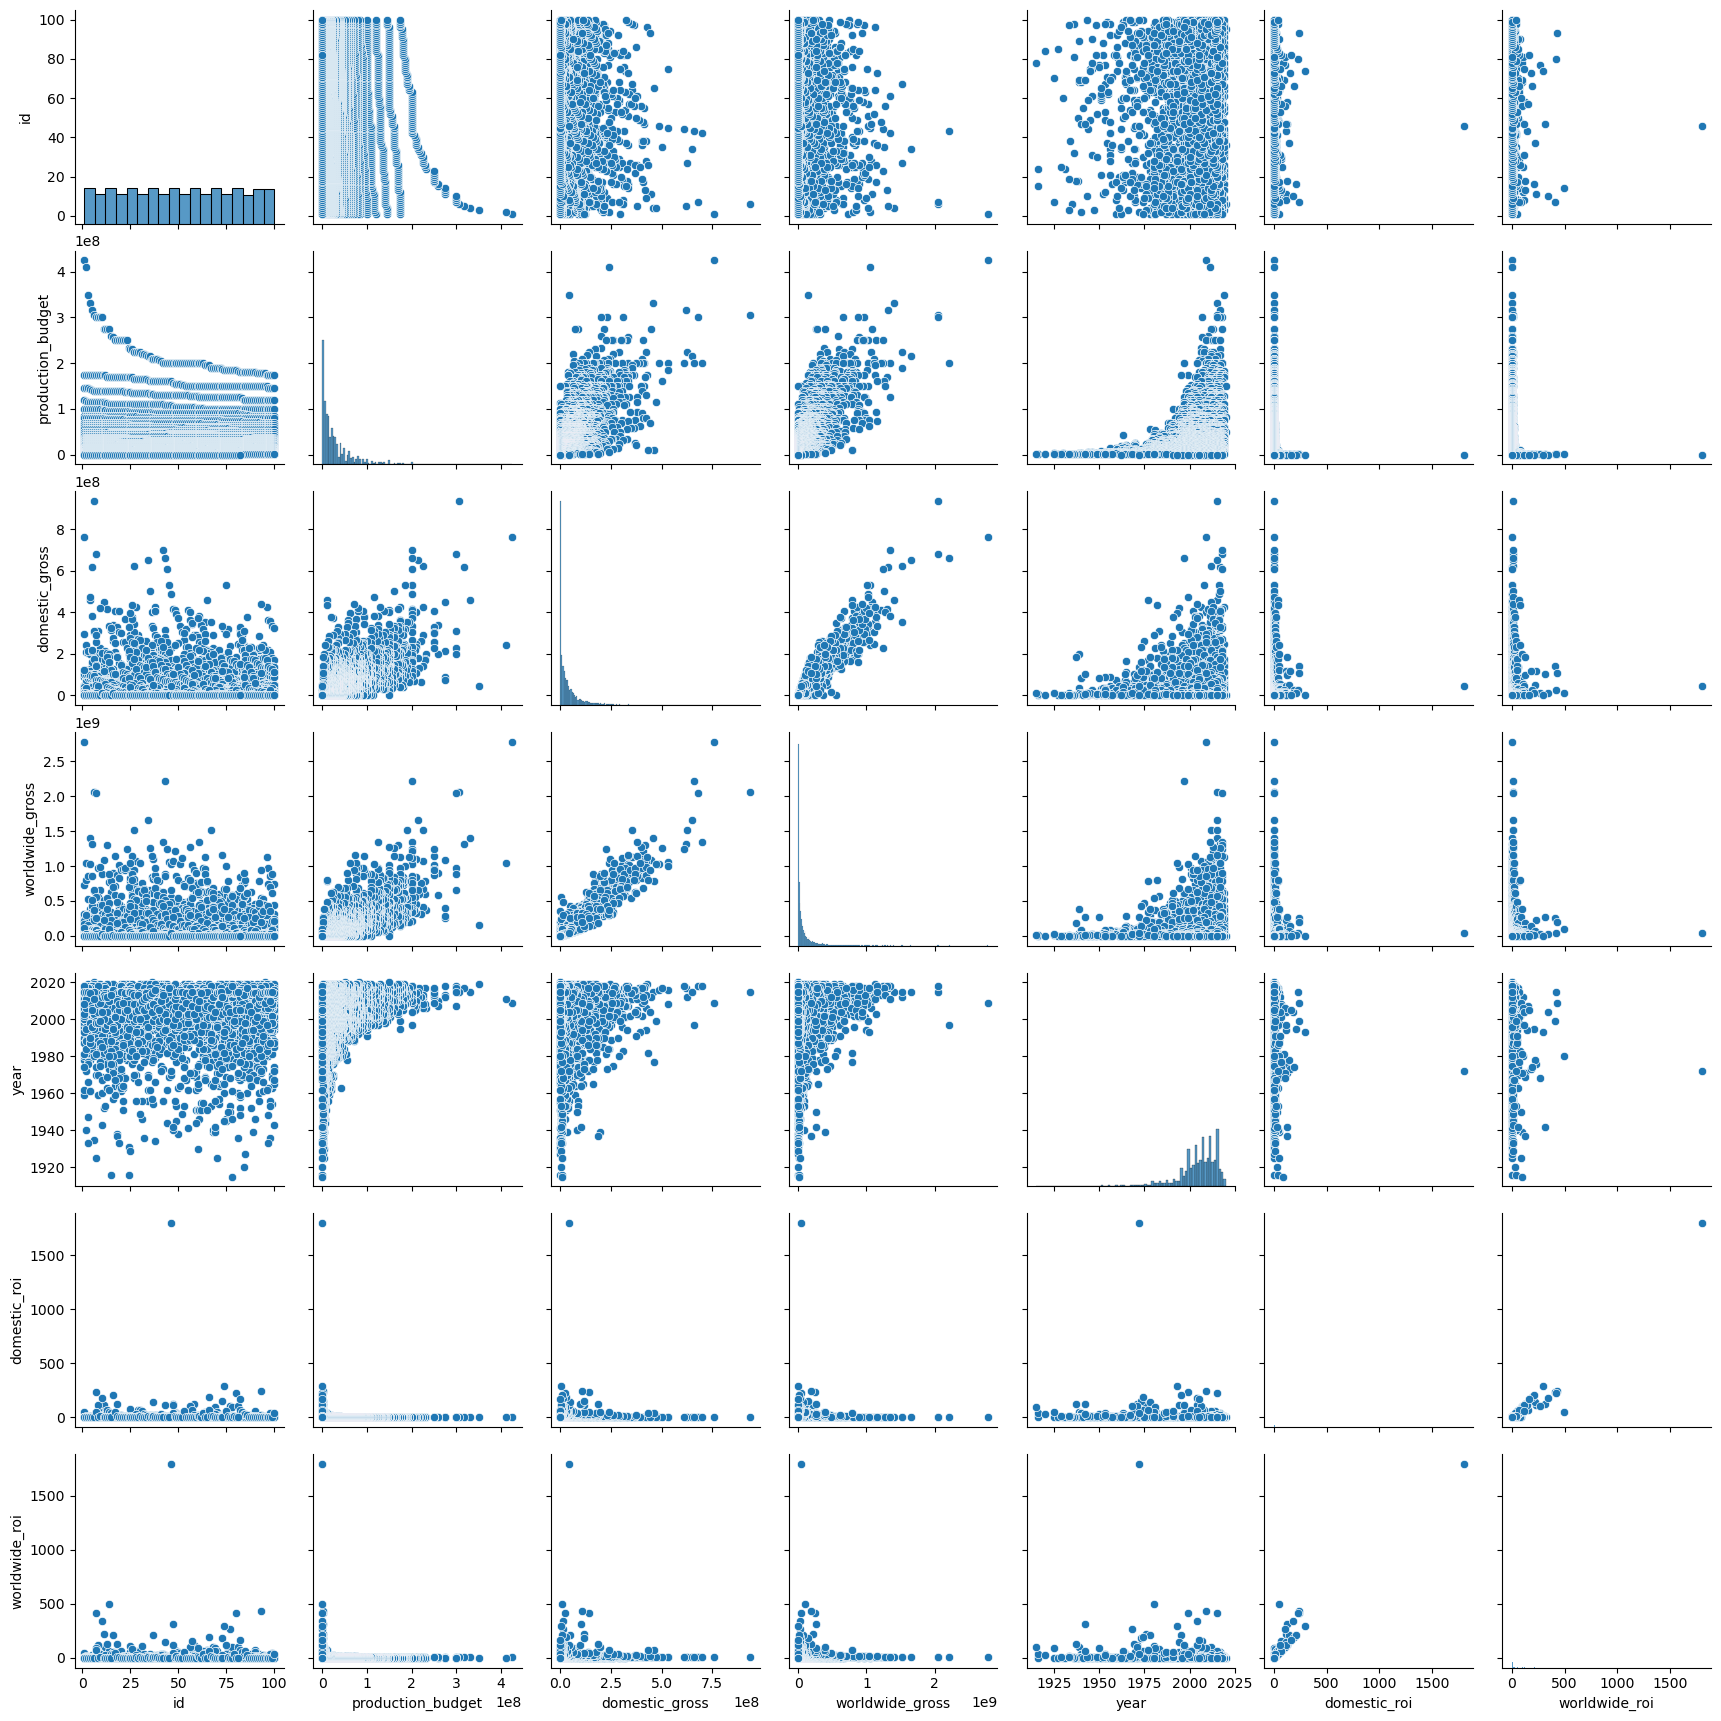

In [192]:
sns.pairplot(tn_budget)
plt.show()

## 5. Recommendations
### 1. Focus on Shorter Duration Films
Data indicates that movies with shorter runtimes tend to achieve higher audience engagement. We recommend optimizing film lengths to align with audience viewing preferences without compromising narrative quality.

### 2. Target International Markets
International releases show greater predictability and performance in terms of box office gross. Expanding production efforts to cater to global audiences can enhance revenue stability and market penetration.

### 3. Invest in High-Demand Language Markets
Films produced in English, French, Spanish, and Russian consistently demonstrate higher popularity and commercial success. Strategic investment in these language segments is advised to capture broader audience bases.

### 4. Prioritize Q4 Release Windows
Historical data shows that film releases during November and December experience significantly higher audience engagement and profitability. Prioritizing production schedules to align with these peak release periods is recommended.

### 5. Expand into Top-Performing Genres
Genres such as Documentary, Drama, and Game Shows have shown strong audience acceptance and commercial viability. Diversifying the production portfolio to include these genres is advised for broader market appeal.

### 6. Partner with High-Grossing Studios
Studios such as Sony Pictures, Warner Bros., and 20th Century Fox have a proven track record of high-grossing films. Collaborations or emulation of their production and distribution strategies could enhance commercial outcomes.

### 7. Maximize Production Budgets Strategically
A higher production budget, when allocated efficiently, correlates positively with profitability. Investing in quality production, casting, and marketing is essential to securing long-term financial returns.



## 6. Conclusion
This analysis explored key factors influencing movie performance, including runtime, language, release month, genre, studio affiliation, and production budget. Trends show varying levels of audience engagement and gross revenue across these variables, offering valuable insights into what drives movie success in the global market.



In [196]:
# TMDB, movie_basics_ratings, tn_budget, bom_df
TMDB.to_excel('TMDB.xlsx', index= False)
movie_basics_ratings.to_excel('movie_basics.xlsx', index=False)
tn_budget.to_excel('tn_budget.xlsx', index=False)
bom_df.to_excel('bom_df.xlsx', index=False)